In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

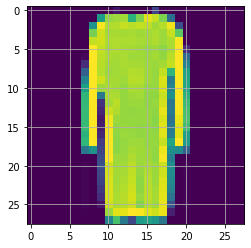

In [ ]:
plt.figure()
plt.imshow(train_images[25])
plt.grid(True)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

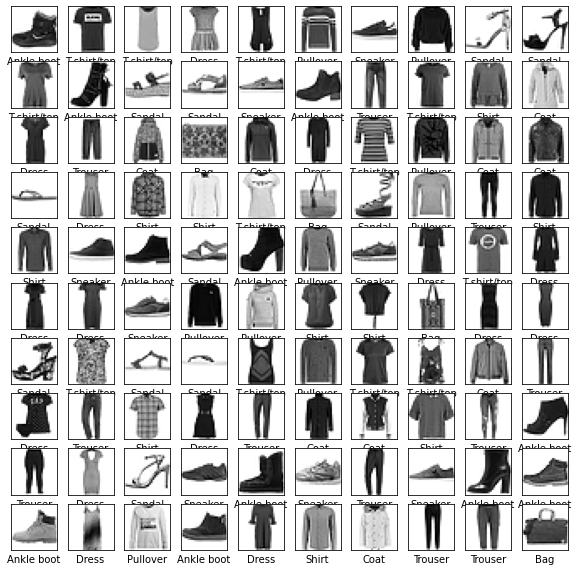

In [ ]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam() , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1982 - accuracy: 0.9266
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1921 - accuracy: 0.9271


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8851
Accuracy  0.8851000070571899


In [ ]:
predictions = model.predict(test_images)

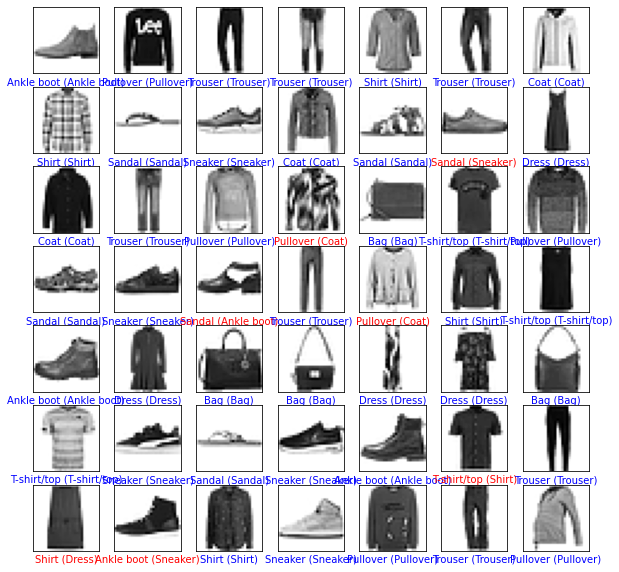

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(49):
  plt.subplot(7, 7, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)